<a href="https://colab.research.google.com/github/mayankchandra11/ML-practice/blob/main/DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Next, we have to read the dataset using the Pandas data frame as follows:
**bold text**

In [3]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [4]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [5]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [6]:
data.head()


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Let's implement the very basic step of data preprocessing.

Predictor  y is the class

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's do the data scaling.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Naive Bayes**

Now, we are training the model with the help of the GaussianNB class of sklearn as follows:

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

Now, we have to make the prediction, which can be done in the following way:

In [17]:
y_pred = classifier.predict(X_train)

In [18]:
accuracy = accuracy_score(y_train, y_pred)
print ("Accuracy:",accuracy)

Accuracy: 0.9619047619047619


In [20]:
y_pred = classifier.predict(X_test)

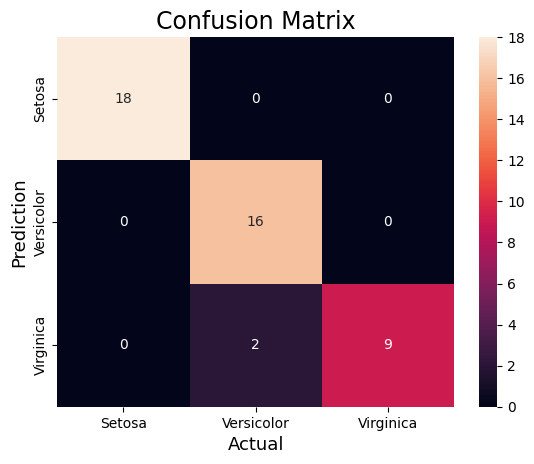

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [22]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.96        45
      macro avg       0.96      0.94      0.95        45
   weighted avg       0.96      0.96      0.95        45

Accuracy: 0.9555555555555556


In [24]:
from sklearn.svm import NuSVC
accuracy_list = []

for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC (kernel=i)
  clf.fit(X_train, y_train)
  y_pred =clf.predict(X_test)
  accuracy = accuracy_score (y_test, y_pred)
  accuracy_list.append(accuracy)
  print("accuracy of " + i, "is", float(accuracy))

accuracy of linear is 0.9555555555555556
accuracy of poly is 0.9333333333333333
accuracy of rbf is 0.9555555555555556
accuracy of sigmoid is 0.9555555555555556


In [25]:
accuracies = {
    'Linear' : accuracy_list[0],
    'Polynomial' : accuracy_list[1],
    'RBF' : accuracy_list[2],
    'Sigmoid' : accuracy_list[3],
}

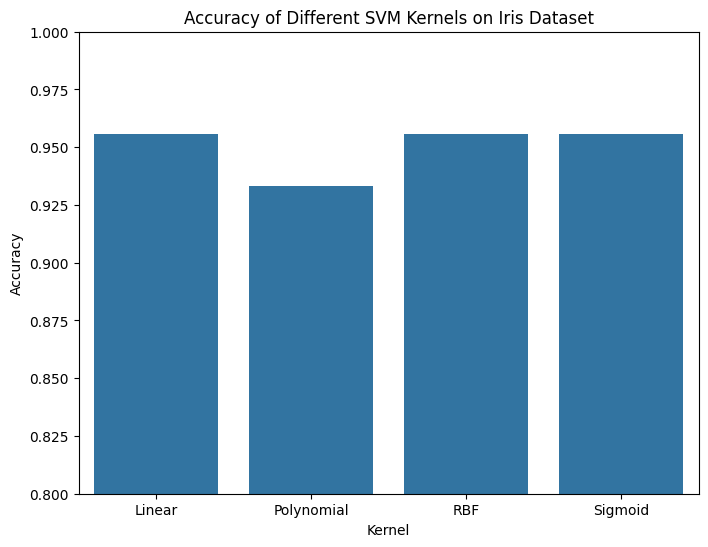

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8,1.0)
plt.show()

Let's print the results as follows:

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[18  0  0]
 [ 0 16  0]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.96        45
      macro avg       0.96      0.94      0.95        45
   weighted avg       0.96      0.96      0.95        45

Accuracy: 0.9555555555555556
